In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Set configuration and path

In [2]:
import os 
# Set Config file kaggle.js
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/coding project/HR analytics"
%cd /content/gdrive/MyDrive/Colab Notebooks/coding project/HR analytics

/content/gdrive/MyDrive/Colab Notebooks/coding project/HR analytics


Get data from Kaggle

In [3]:
 !kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset

  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 5.71MB/s]


In [4]:
!ls

ibm-hr-analytics-attrition-dataset.zip	kaggle.json


In [6]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip && rm *.zip

Archive:  ibm-hr-analytics-attrition-dataset.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


In [7]:
!ls

kaggle.json  WA_Fn-UseC_-HR-Employee-Attrition.csv


Read data

In [32]:
import numpy as np
import pandas as pd
from plotnine import *
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [9]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [22]:
df.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [26]:
display(df.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

## Exploratory Data Analysis

In [19]:
df_pivot = df.pivot_table(index='JobRole',columns=['Attrition'],values=['MonthlyRate'], aggfunc='mean')
df_pivot = df_pivot.reset_index()

In [20]:
df_pivot

JobRole   MonthlyRate              
Attrition                                       No           Yes
0          Healthcare Representative  14430.885246  13984.222222
1                    Human Resources  13424.200000  12853.083333
2              Laboratory Technician  14071.969543  14047.290323
3                            Manager  15049.608247  16885.000000
4             Manufacturing Director  14495.807407  14251.600000
5                  Research Director  14928.243590  21020.500000
6                 Research Scientist  13970.689796  13699.957447
7                    Sales Executive  14224.342007  15635.684211
8               Sales Representative  13793.520000  15012.575758

แสดงข้อมูลรายได้ต่อเดือน(Monthly Income) เปรียบเทียบกันระหว่างคนที่ลาออก(Leave)กับคนที่ไม่ลาออก(Stay)

Text(0, 0.5, 'Job Role')

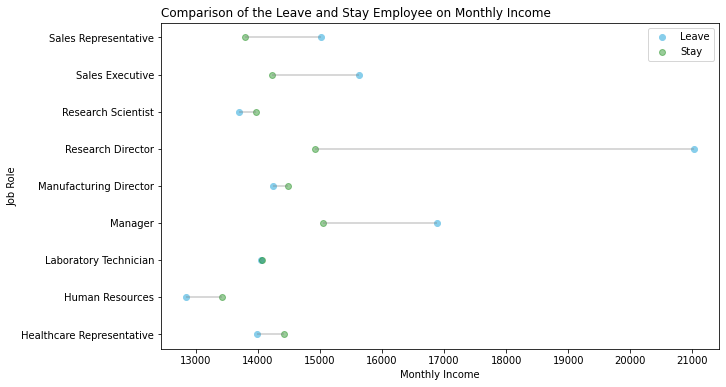

In [42]:
plt.figure(figsize=(10,6))
ordered_df = df_pivot
my_range = range(1,len(df_pivot.index)+1)

plt.hlines(y=my_range, xmin=ordered_df['MonthlyRate','Yes'], xmax=ordered_df['MonthlyRate','No'], color='grey', alpha=0.4)
plt.scatter(ordered_df['MonthlyRate','Yes'], my_range, color='skyblue', alpha=1, label='Leave')
plt.scatter(ordered_df['MonthlyRate','No'], my_range, color='Green', alpha=0.4, label='Stay')
plt.legend()

# Add title and axis names 
plt.yticks(my_range, ordered_df['JobRole'])
plt.title('Comparison of the Leave and Stay Employee on Monthly Income', loc='left')
plt.xlabel('Monthly Income')
plt.ylabel('Job Role')

แสดงข้อมูลคนที่่ลาออก(Leave) กับคนที่ไม่ลาออก(Stay) เปรียบเทียบตามสถานะสมรสและอายุงาน

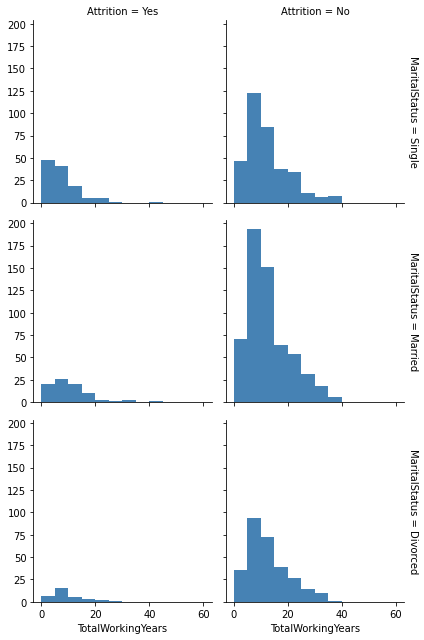

In [44]:
g = sns.FacetGrid(df,row="MaritalStatus", col="Attrition", margin_titles=True)
bins = np.linspace(0,60,13)
g.map(plt.hist, "TotalWorkingYears",color="steelblue",bins=bins)

แสดงข้อมูลความสัมพันธ์(Correlation) ระหว่าง features ในรูปแบบ Heatmap

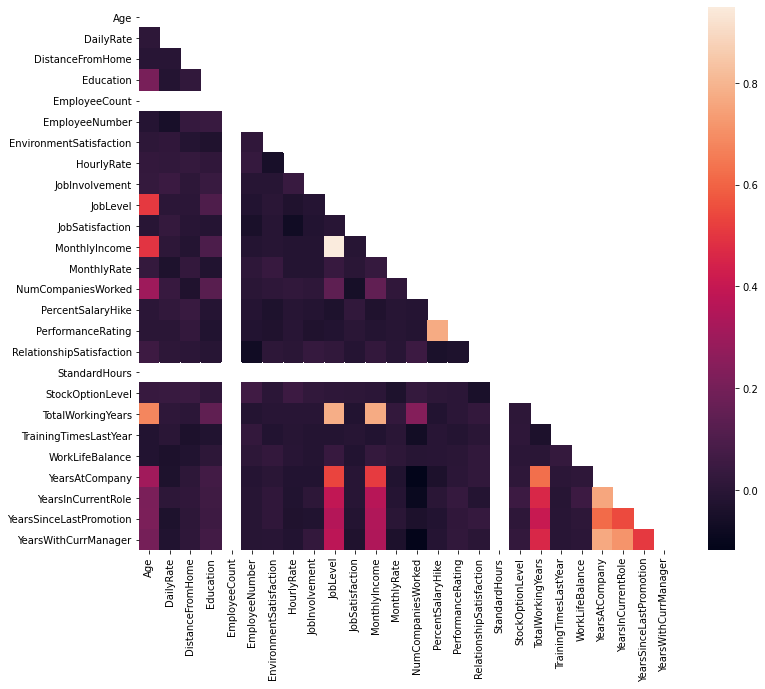

In [47]:
plt.figure(figsize=(12,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),mask=matrix)

แสดง Performance Rating เทียบกันระหว่างคนลาออก(Leave) กับคนที่ไม่ลาออก(Stay)

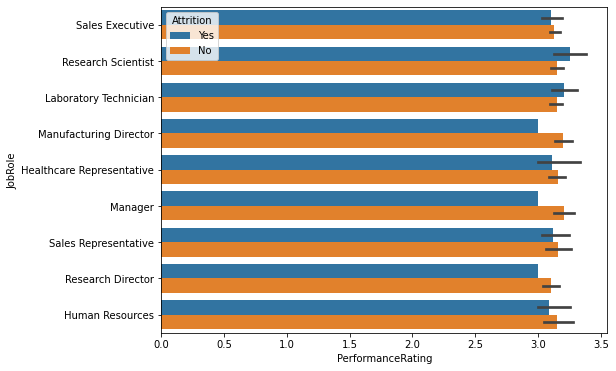

In [48]:
plt.figure(figsize=(8,6))
sns.barplot(x='PerformanceRating', y='JobRole', hue='Attrition', data=df)

แสดงจำนวน Employee ของแต่ละ Job Role

Text(0, 0.5, 'Count of Job Role')

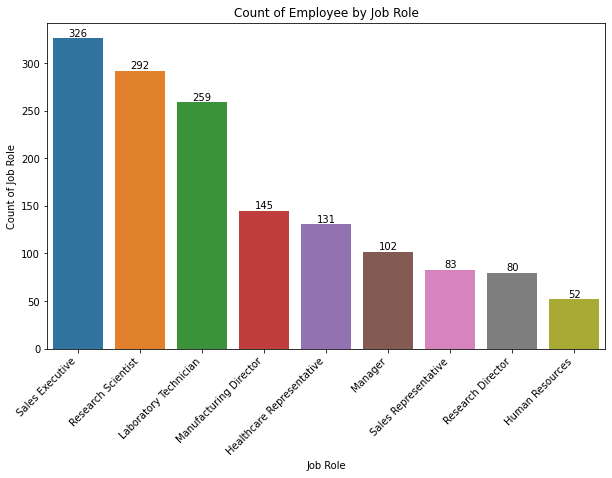

In [52]:
plt.figure(figsize = (10, 6))
ocean_plot = sns.countplot(x = 'JobRole', data = df)
for p in ocean_plot.patches:
    ocean_plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of Employee by Job Role")
plt.xlabel("Job Role")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)
plt.ylabel("Count of Job Role")

In [56]:
df_leave = df[df.Attrition=='Yes']
df_leave.head().T

,0,2,14,21,24
Age,41,37,28,36,34
Attrition,Yes,Yes,Yes,Yes,Yes
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,1102,1373,103,1218,699
Department,Sales,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,2,24,9,6
Education,2,2,3,4,1
EducationField,Life Sciences,Other,Life Sciences,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,4,19,27,31


Text(450.6285714285715, 0.5, 'Num Companies Worked')

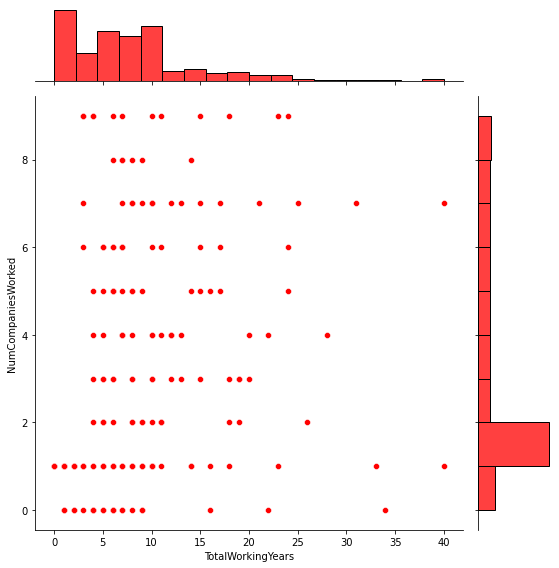

In [59]:
sns.jointplot(x = "TotalWorkingYears", y = "NumCompaniesWorked", data=df_leave,  height = 8, color = 'r')
plt.xlabel("Total Working Years")
plt.ylabel("Num Companies Worked")

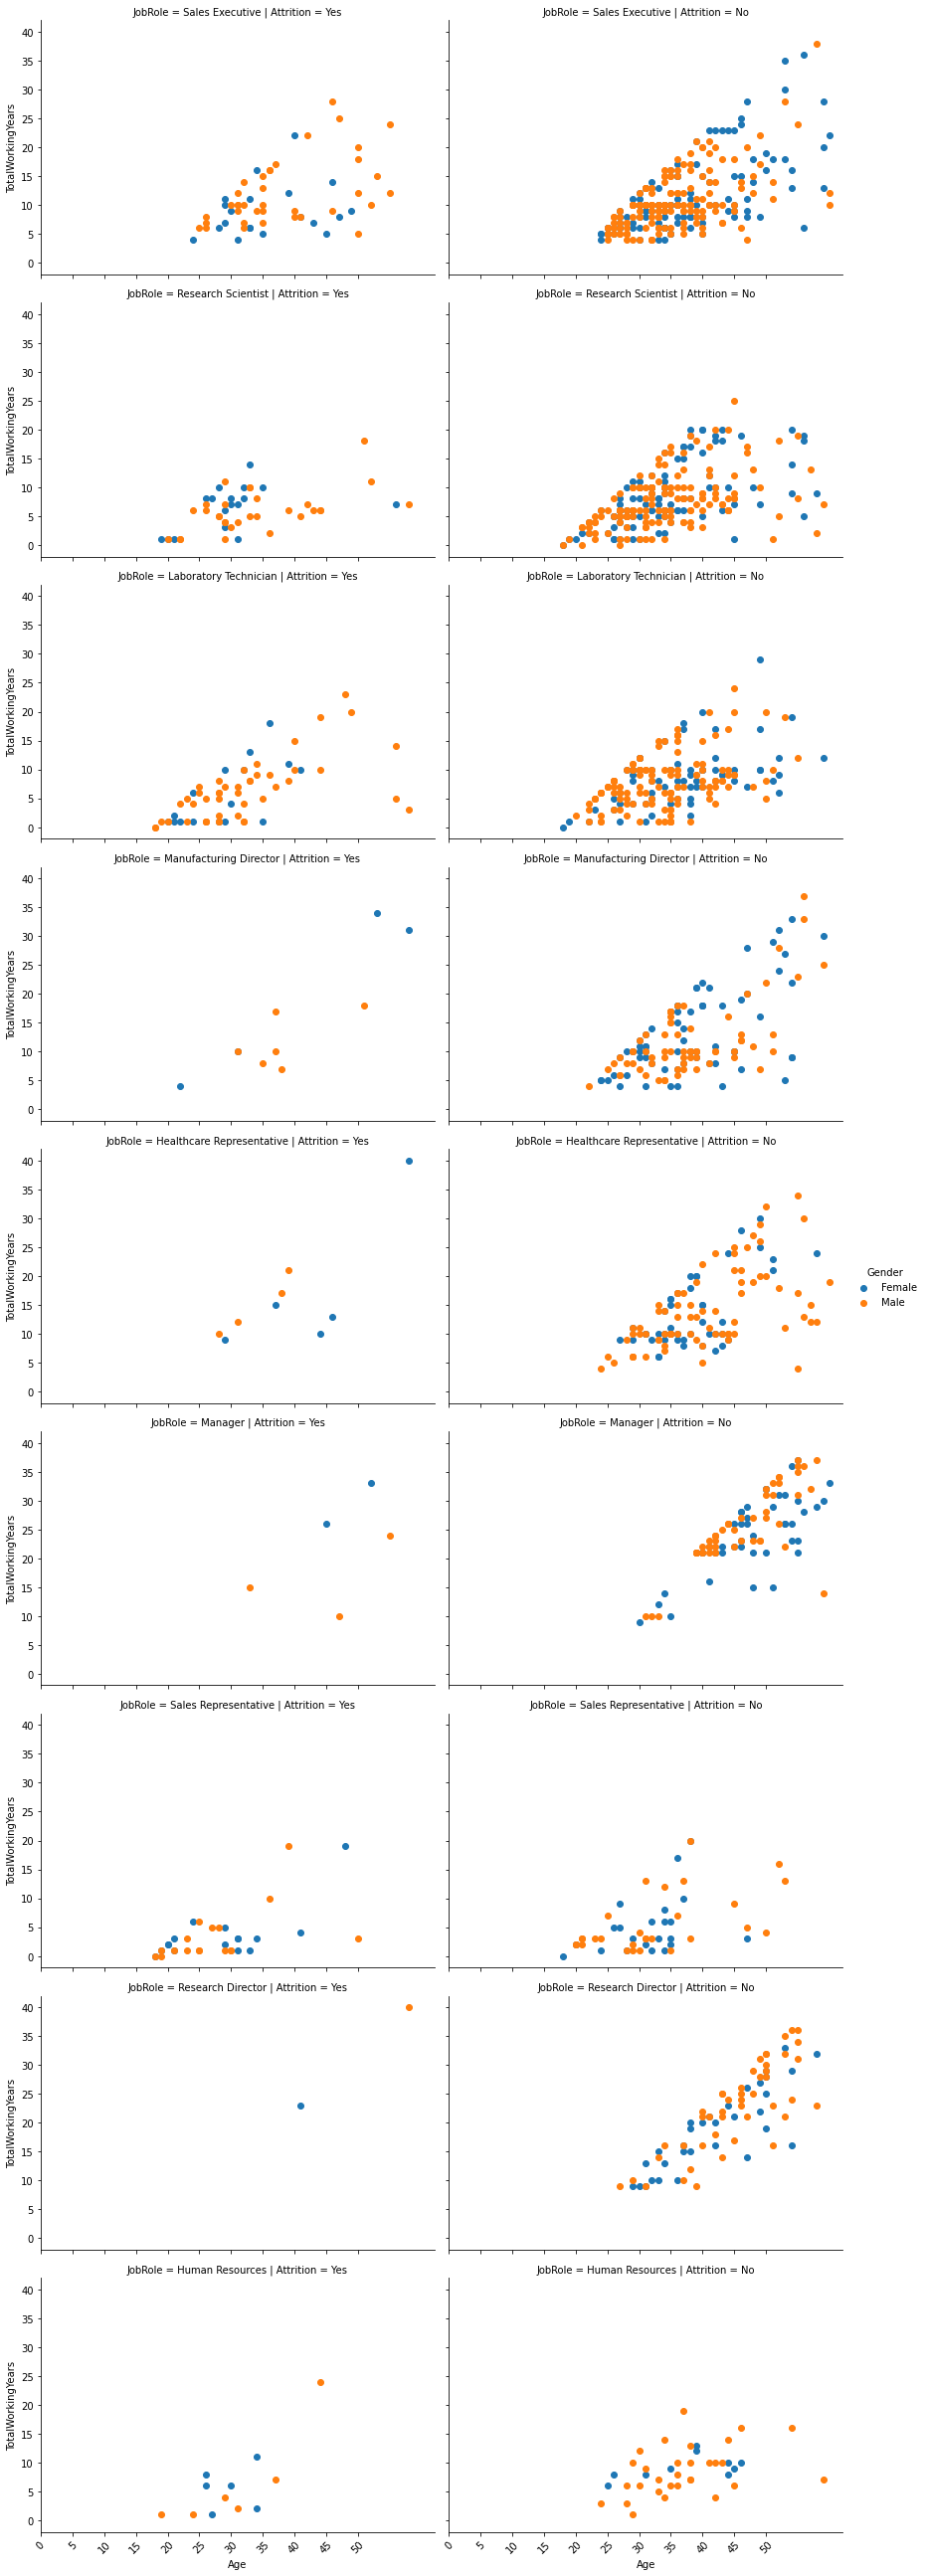

In [60]:
facet_grid = sns.FacetGrid(row='JobRole', col='Attrition', hue='Gender', data=df, height=4, aspect=1.5)
facet_grid = facet_grid.map(plt.scatter, 'Age','TotalWorkingYears')
facet_grid = facet_grid.add_legend()
all_axes = facet_grid.axes
for ax in all_axes.flatten():
    ax.set_xticks(np.arange(0,55,5))
    ax.tick_params('x', labelrotation=45)